In [51]:
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [52]:
#Carrega os dados

x = np.load("Ex3X.npy")
y = np.load("Ex3y.npy")

x = np.array([(1,i[0],i[1]) for i in x])

In [53]:
#Função de custo

def  calc_cost(x,y,theta):
    return (1/len(y))*np.sum(np.square(y-x.dot(theta.T)))

    

In [54]:
#Descida do gradiente
def gradient_descent(x,y,theta,learning_rate=0.01,iterations=100):
    n = len(y)
    cost = np.zeros(iterations)
    for i in range(iterations):
        prediction = np.dot(x,theta) 
        theta = theta -(learning_rate/n)*np.sum(x.T.dot((prediction - y)))
        cost[i] = calc_cost(x, y, theta)
        
    return theta,cost
        

In [55]:
#Stochastic Gradient Descent
def SGD(x,y,theta,learning_rate=0.05,iterations=1000):
    n = len(y)
    cost = np.zeros(iterations)
    for i in range(iterations):
        rand_int = np.random.randint(0,n)
        x_i = x[rand_int].reshape(1,x.shape[1])
        y_i = y[rand_int].reshape(1,1)

        prediction = np.dot(x_i,theta) 
        theta = theta -(learning_rate/n)*np.sum(x_i.T.dot((prediction - y_i)))
        cost[i] += calc_cost(x_i,y_i,theta)
        
    return theta,cost 

In [56]:
#Minibatch
def mini_batch(x,y,theta,learning_rate=0.01,iterations=200):
    n = len(y)
    cost = np.zeros(iterations)
    for i in range(iterations):
        c = 0
        for j in range(10):
            rand_int = np.random.randint(0,n)
            x_i = x[rand_int].reshape(1,x.shape[1])
            y_i = y[rand_int].reshape(1,1)

            prediction = np.dot(x_i,theta) 
            theta = theta -(learning_rate/n)*np.sum(x_i.T.dot((prediction - y_i)))
            c += calc_cost(x_i,y_i,theta)
        
        cost[i] = c
        
    return theta,cost 
        

In [57]:
#    0.01
learning_rate = 0.01

theta1,cost1 = gradient_descent(x,y,np.zeros(3),learning_rate,100)
finalCost = calc_cost(x,y,theta)
print(finalCost) 

7166.297246849835


In [58]:
#    0.001
learning_rate = 0.001

theta2,cost2 = gradient_descent(x,y,np.zeros(3),learning_rate,100)
finalCost = calc_cost(x,y,theta)
print(finalCost) 

7166.297246849835


In [59]:
#    0.00005
learning_rate = 0.00005
theta3,cost3 = gradient_descent(x,y,np.zeros(3),learning_rate,100)
finalCost = calc_cost(x,y,theta)
print(finalCost) 

7166.297246849835


Text(0.5, 1.0, 'Sharing X axis')

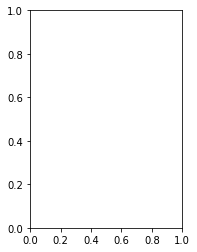

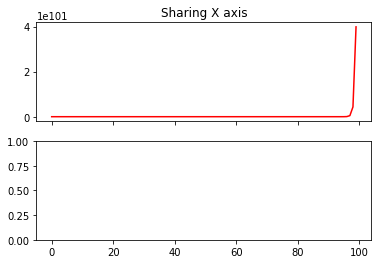

In [60]:
fig, ax = plt.subplots() 

plt.subplot(1, 2, 1)
#ax.plot(np.arange(len(cost)), cost, 'r')  
#ax.set_xlabel('Iterações')  
#ax.set_ylabel('Custo')  
#ax.set_title('Erro vs Época') 


# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(np.arange(len(cost1)), cost1, 'r') 
axarr[0].set_title('Sharing X axis')
#axarr[1].scatter(x, y)

In [396]:
a = [1,2,3,4,5]

[1, 2, 3]